In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Dosepy import image
from Dosepy.tools.gamma import chi

In [2]:
# Load film and dcm array form csv
path_to_film = "/media/luis/TOMO/Dosepy/gamma_testing/film_dose_map.csv"
path_to_dcm = "/media/luis/TOMO/Dosepy/gamma_testing/dcm_dose_map.csv"

film_array = np.genfromtxt(path_to_film, delimiter=",")
dcm_array = np.genfromtxt(path_to_dcm, delimiter=",")

print(film_array.shape)
print(dcm_array.shape)

(590, 590)
(200, 200)


In [3]:
film = image.ArrayImage(film_array, dpi=75)
dcm = image.ArrayImage(dcm_array, dpi=25.4)

In [4]:
# Equate resolution

film.reduce_resolution_as(dcm)

film_reduced = image.ArrayImage(film.array[50:130, 40: 160], dpi=25.4)
dcm_reduced = image.ArrayImage(dcm.array[50:130, 40: 160], dpi=25.4)

In [5]:
g, p = film_reduced.gamma2D(dcm_reduced, 3, 2)

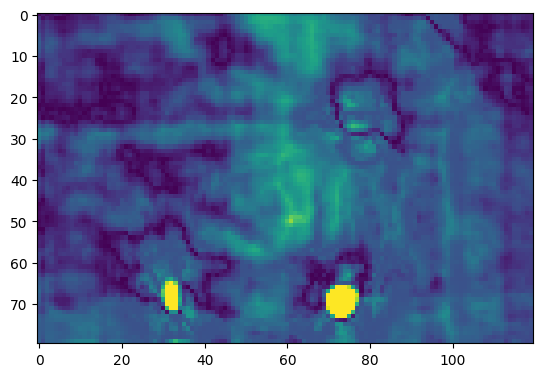

In [6]:
plt.imshow(g, vmax=2)

In [7]:
# Passing rate
p

np.float64(94.39583333333333)

99.01041666666667


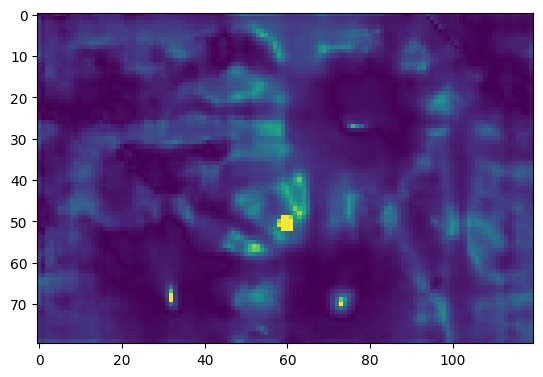

In [8]:
# Calculate Chi

chi_map, chi_rate = chi(
    reference_image = dcm_reduced,
    comparison_image = film_reduced,
    doseTA = 2,
    distTA = 1,
)
plt.imshow(chi_map, vmax=2, )
print(chi_rate)

In [9]:
print(chi_rate)

99.01041666666667


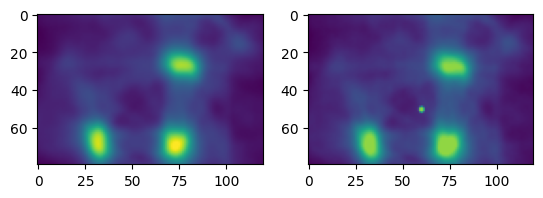

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(dcm_reduced.array, vmax=15)
ax2.imshow(film_reduced.array, vmax=15)

In [11]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'